## Завантажуємо необхідні бібліотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import grid_search
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Vera/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Vera/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Завантажуємо дані

In [2]:
data = pd.read_csv('data.csv', index_col=0)

## Розділимо дані на таблицю ознак та таблицю значень, що будемо передбачати

In [3]:
data_X = data.ix[:, data.columns != 'imdb_rating']
data_Y = data['imdb_rating']

### Розділимо дані на тестову та валідаційну вибірки

In [4]:
train_X,test_X = train_test_split(data_X, test_size=0.2, random_state=42)
train_y,test_y = train_test_split(data_Y, test_size=0.2, random_state=42)

### Нормалізуємо дані 

In [5]:
scaler = StandardScaler()
scaler.fit(train_X, train_y)
scaled_train_X = scaler.transform(train_X)
scaled_test_X = scaler.transform(test_X)

-----------------

## Навчимо LinearRegression 

#### LinearRegression - лінійна модель с коефіцієнтами W = (w_1, ..., W_p), яка мінімізує суму квадратів різниці між передбачини та реальними відповідями.

In [6]:
lr = LinearRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

### Оцінимо якість LinearRegression

In [7]:
print ('Середня абсолютна помилка:', mean_absolute_error(test_y, predictions))
print ('Середня квадратична помилка', mean_squared_error(test_y, predictions))
print ('Коефіцієнт детермінації', r2_score(test_y, predictions))

Середня абсолютна помилка: 0.318884874557
Середня квадратична помилка 0.16694938465
Коефіцієнт детермінації 0.656827438486


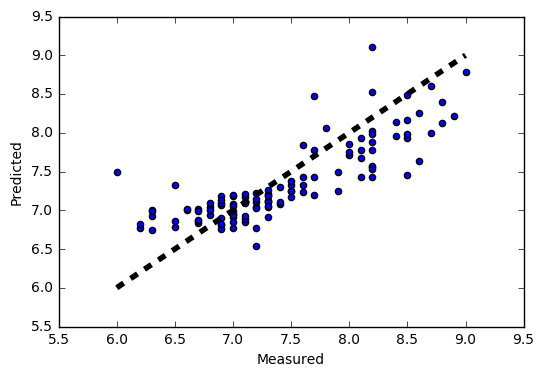

In [8]:
fig, ax = plt.subplots()
ax.scatter(test_y, predictions)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Подивимось на коефіцієнти, що вивчила модель

##### Чим більший коефіцієнт, тим інформативніша ознака

In [9]:
list(zip(data_X.columns, lr.coef_))

[('num_characters', 0.002026422795574702),
 ('words_count', 7.3934075680725115e-05),
 ('num_locations', -0.0016799446330193954),
 ('us_viewers_in_millions', 0.0080438684065662278),
 ('views', 7.9783161643379934e-06),
 ('imdb_votes', 0.0010917709376312701),
 ('main_character_Bart Simpson', 0.030513874935558811),
 ('main_character_Else', -0.0036118044023494555),
 ('main_character_Homer Simpson', -0.010735782250618652),
 ('main_character_Lisa Simpson', 0.030049147895135402),
 ('main_character_Marge Simpson', -0.046215436177726048),
 ('main_location_Elsewhere', -0.067644623718438643),
 ("main_location_Moe's Tavern", -0.059274055692979742),
 ('main_location_Simpson Home', -0.054741185860502237),
 ('main_location_Springfield Elementary School', 0.020057823727325987),
 ('main_location_Springfield Nuclear Power Plant', 0.16160204154459459)]

-----------------

## Навчимо Lasso Regression

##### Lasso Regression - лінійна модель, що використовує L1 регуляризацію

In [10]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV
lasso = Lasso(random_state=3)
lasso.fit(train_X, train_y)
lasso_predictions = lasso.predict(test_X)

### Оцінимо якість Lasso Regression

In [11]:
print ('Середня абсолютна помилка:', mean_absolute_error(test_y, lasso_predictions))
print ('Середня квадратична помилка', mean_squared_error(test_y, lasso_predictions))
print ('Коефіцієнт детермінації', r2_score(test_y, lasso_predictions))

Середня абсолютна помилка: 0.314779251394
Середня квадратична помилка 0.163708017363
Коефіцієнт детермінації 0.663490226235


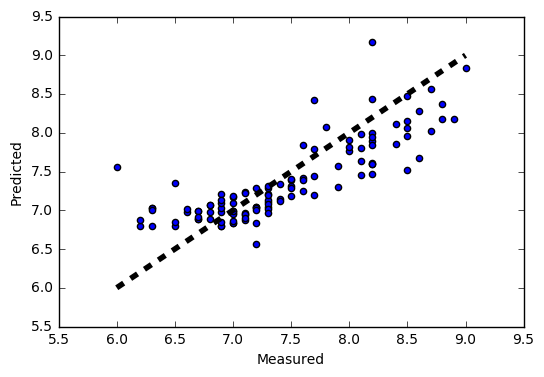

In [12]:
fig, ax = plt.subplots()
ax.scatter(test_y, lasso_predictions)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Подивимось на коефіцієнти, що вивчила модель

In [13]:
list(zip(data_X.columns, lasso.coef_))

[('num_characters', 0.0),
 ('words_count', 9.4503472519041201e-05),
 ('num_locations', -0.0),
 ('us_viewers_in_millions', 0.0),
 ('views', 8.3122711403094533e-06),
 ('imdb_votes', 0.0011832759880837504),
 ('main_character_Bart Simpson', 0.0),
 ('main_character_Else', 0.0),
 ('main_character_Homer Simpson', -0.0),
 ('main_character_Lisa Simpson', 0.0),
 ('main_character_Marge Simpson', -0.0),
 ('main_location_Elsewhere', -0.0),
 ("main_location_Moe's Tavern", -0.0),
 ('main_location_Simpson Home', 0.0),
 ('main_location_Springfield Elementary School', 0.0),
 ('main_location_Springfield Nuclear Power Plant', 0.0)]

-----------------

## Навчимо Ridge Regression

##### Ridge Regression - лінійна модель, що використовує L2 регуляризацію

In [14]:
ridge = Ridge(random_state=3)
ridge.fit(train_X, train_y)
ridge_predictions = ridge.predict(test_X)

### Оцінимо якість Ridge Regression

In [15]:
print ('Середня абсолютна помилка:', mean_absolute_error(test_y, ridge_predictions))
print ('Середня квадратична помилка', mean_squared_error(test_y, ridge_predictions))
print ('Коефіцієнт детермінації', r2_score(test_y, ridge_predictions))

Середня абсолютна помилка: 0.318809473004
Середня квадратична помилка 0.166850189463
Коефіцієнт детермінації 0.657031339007


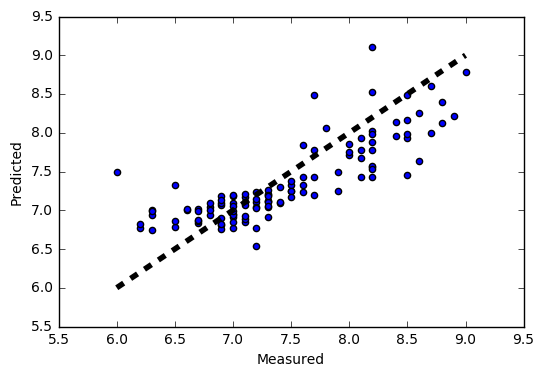

In [16]:
fig, ax = plt.subplots()
ax.scatter(test_y, ridge_predictions)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Подивимось на коефіцієнти, що вивчила модель

In [17]:
list(zip(data_X.columns, ridge.coef_))

[('num_characters', 0.0020177115739324273),
 ('words_count', 7.4003339484274516e-05),
 ('num_locations', -0.0016798952367752054),
 ('us_viewers_in_millions', 0.0080052478345230497),
 ('views', 7.972231415283406e-06),
 ('imdb_votes', 0.0010934362760114959),
 ('main_character_Bart Simpson', 0.029769909298105027),
 ('main_character_Else', -0.0038184939593026933),
 ('main_character_Homer Simpson', -0.010887756557485369),
 ('main_character_Lisa Simpson', 0.029353598776281964),
 ('main_character_Marge Simpson', -0.044417257557605325),
 ('main_location_Elsewhere', -0.065023294223853681),
 ("main_location_Moe's Tavern", -0.052963630805362295),
 ('main_location_Simpson Home', -0.052275396495719287),
 ('main_location_Springfield Elementary School', 0.021743003770399859),
 ('main_location_Springfield Nuclear Power Plant', 0.14851931775453256)]

### Видалимо найбільш інформативні ознаки

In [18]:
train_X_drop = train_X.drop(['views', 'us_viewers_in_millions', 'imdb_votes'], axis = 1)
test_X_drop = test_X.drop(['views', 'us_viewers_in_millions', 'imdb_votes'], axis = 1)

In [19]:
lasso_drop = Lasso(random_state=3)
lasso_drop.fit(train_X_drop, train_y)
lasso_drop_predictions = lasso_drop.predict(test_X_drop)

In [20]:
print ('Середня абсолютна помилка:', mean_absolute_error(test_y, lasso_drop_predictions))
print ('Середня квадратична помилка', mean_squared_error(test_y, lasso_drop_predictions))
print ('Коефіцієнт детермінації', r2_score(test_y, lasso_drop_predictions))

Середня абсолютна помилка: 0.542840343908
Середня квадратична помилка 0.469307890916
Коефіцієнт детермінації 0.0353148566449


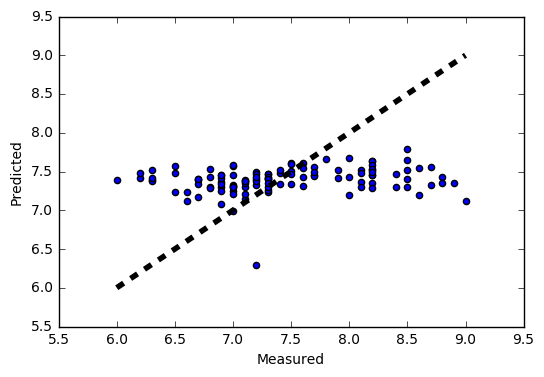

In [21]:
fig, ax = plt.subplots()
ax.scatter(test_y, lasso_drop_predictions)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Використаємо найбільш інформативні ознаки

In [22]:
train_X_main = train_X[['views', 'us_viewers_in_millions', 'imdb_votes']]
test_X_main = test_X[['views', 'us_viewers_in_millions', 'imdb_votes']]

In [23]:
lasso_main = Lasso(random_state=3)
lasso_main.fit(train_X_main, train_y)
lasso_main_predictions = lasso_main.predict(test_X_main)

In [24]:
print ('Середня абсолютна помилка:', mean_absolute_error(test_y, lasso_main_predictions))
print ('Середня квадратична помилка', mean_squared_error(test_y, lasso_main_predictions))
print ('Коефіцієнт детермінації', r2_score(test_y, lasso_main_predictions))

Середня абсолютна помилка: 0.31426491215
Середня квадратична помилка 0.161476385874
Коефіцієнт детермінації 0.668077453054


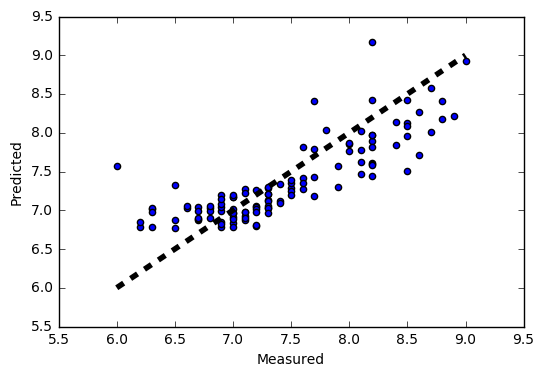

In [25]:
fig, ax = plt.subplots()
ax.scatter(test_y, lasso_main_predictions)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

--------------

## Навчимо RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
regressor = RandomForestRegressor(random_state = 0, max_depth = 200, n_estimators = 150)
regressor.fit(train_X, train_y)
regressor_predictions = regressor.predict(test_X)

### Оцінимо якість RandomForestRegressor

In [28]:
print ('Середня абсолютна помилка:', mean_absolute_error(test_y, regressor_predictions))
print ('Середня квадратична помилка', mean_squared_error(test_y, regressor_predictions))
print ('Коефіцієнт детермінації', r2_score(test_y, regressor_predictions))

Середня абсолютна помилка: 0.256111111111
Середня квадратична помилка 0.11979994152
Коефіцієнт детермінації 0.753745406808


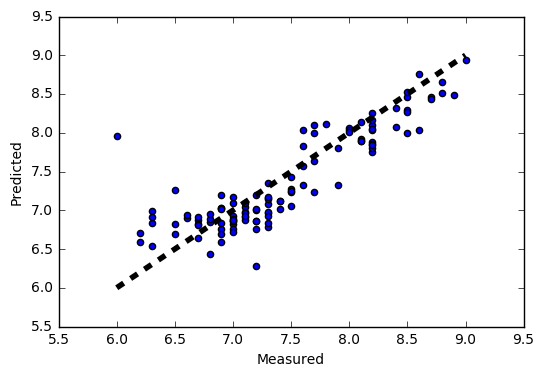

In [29]:
fig, ax = plt.subplots()
ax.scatter(test_y, regressor_predictions)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()